In [22]:
import numpy as np
import matplotlib.pyplot as plt

# lightspeed
c = 3e8
# distance
d = 600
# delay
delay = 2 * d / c
# pulse width
tau = 7e-6
# sampling_rate
fs = 20e6
# frequency low
fl = 222e6
# band width
bw = 6e6


In [23]:
num_samples = int(tau * fs)
num_delayed = int(delay * fs)

length = num_samples + num_delayed

times = np.linspace(0, tau - 1 / fs, num_samples)
phase = (2 * np.pi * fl * times + np.pi * bw / tau * times ** 2)
signal = np.cos(phase)

signal_1 = np.zeros(length)
signal_1[:num_samples] = signal

signal_2 = np.zeros(length)
signal_2[num_delayed:] = signal

signal = signal_1 + signal_2

print(signal_1)
print(signal_2)
# print(signal)

print(len(signal))

[ 1.00000000e+00  8.05041731e-01  2.83298070e-01 -3.66037214e-01
 -8.67517522e-01 -9.85871019e-01 -6.44314330e-01  1.57073173e-02
  6.77976411e-01  9.96555171e-01  7.81831482e-01  1.27559216e-01
 -6.09354686e-01 -9.92935955e-01 -7.70513243e-01 -5.60704472e-02
  7.03926183e-01  9.98165117e-01  6.02213200e-01 -2.29079041e-01
 -9.00968868e-01 -8.98027576e-01 -1.96190637e-01  6.69686290e-01
  9.94204696e-01  4.83718887e-01 -4.49987113e-01 -9.92935955e-01
 -6.37423990e-01  3.15412441e-01  9.74927912e-01  6.86181183e-01
 -2.91894792e-01 -9.78302845e-01 -6.44314330e-01  3.82683432e-01
  9.97422925e-01  4.99352075e-01 -5.73167882e-01 -9.82705260e-01
 -2.22520934e-01  8.12955593e-01  8.44327926e-01 -1.93989761e-01
 -9.86976320e-01 -4.83718887e-01  6.71351092e-01  9.13240964e-01
 -1.16423104e-01 -9.85109326e-01 -4.33883739e-01  7.57483601e-01
  8.19437965e-01 -3.66037214e-01 -9.88380467e-01 -5.60704472e-02
  9.68583161e-01  4.19678408e-01 -8.24549629e-01 -6.86181183e-01
  6.23489802e-01  8.54976

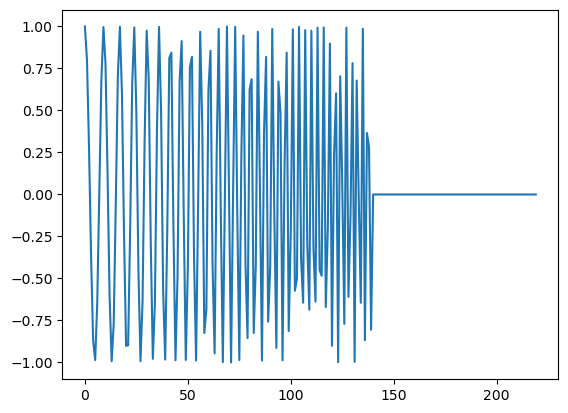

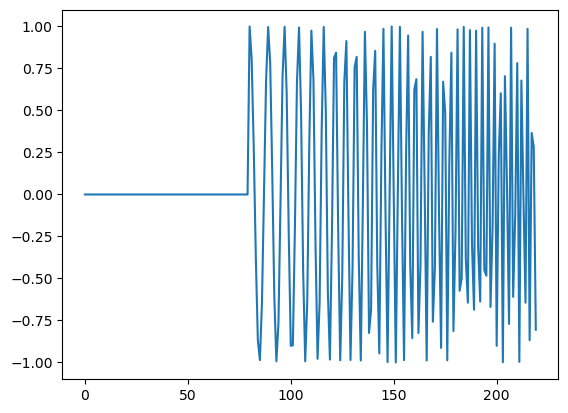

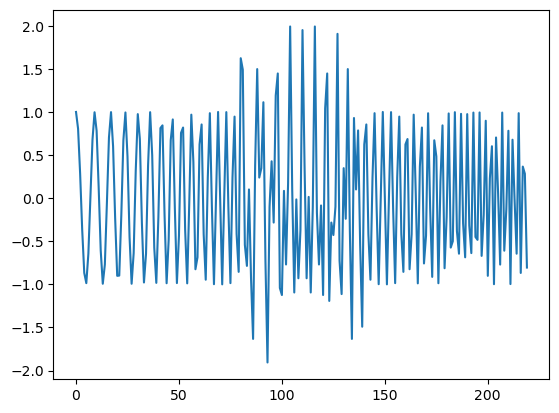

In [24]:
plt.plot(signal_1)
plt.show()

plt.plot(signal_2)
plt.show()

plt.plot(signal)
plt.show()

0.8024720736417631
0.8024720736417631


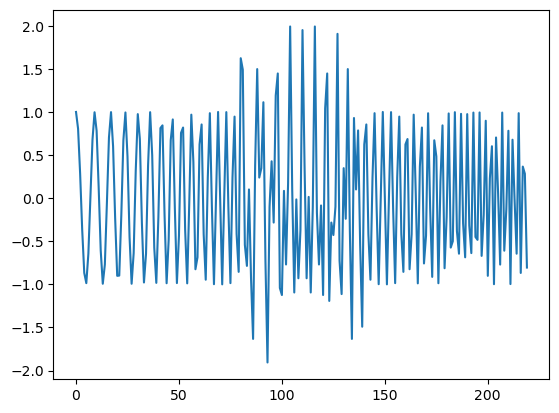

In [25]:
# 高斯白噪声
# snr = 1
# snr = 10 ** (snr / 10)

# xpower = np.sum(signal ** 2) / length
# npower = xpower / snr
# noise = np.random.randn(length) * np.sqrt(npower)

def wgn(n, snr):
    snr = 10 ** (snr / 10)
    xpower = np.sum(signal ** 2) / n
    npower = xpower / snr
    print(np.sqrt(npower))
    noise = np.random.randn(n) * np.sqrt(npower)
    return noise


signal_noised = signal + wgn(length, 0)
signal_noised = signal

# independent noise
noise = wgn(length, 0)

plt.plot(signal_noised)
plt.show()

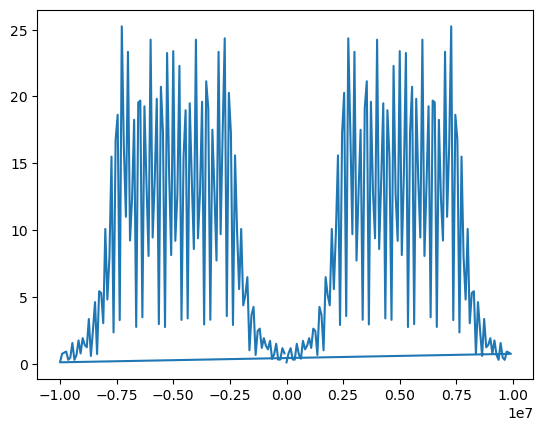

In [26]:
siganl_fft = np.fft.fft(signal_noised)
signal_fft_freq = np.fft.fftfreq(length, 1 / fs)
plt.plot(signal_fft_freq, np.abs(siganl_fft))
plt.show()

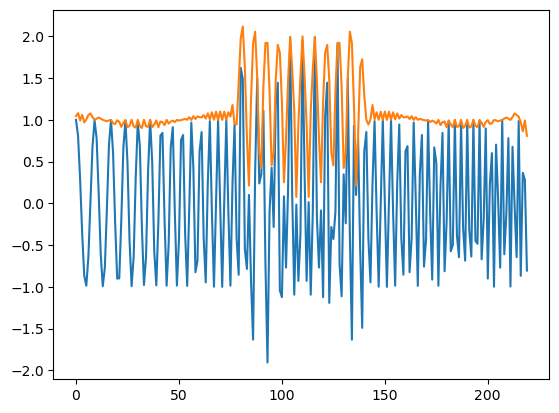

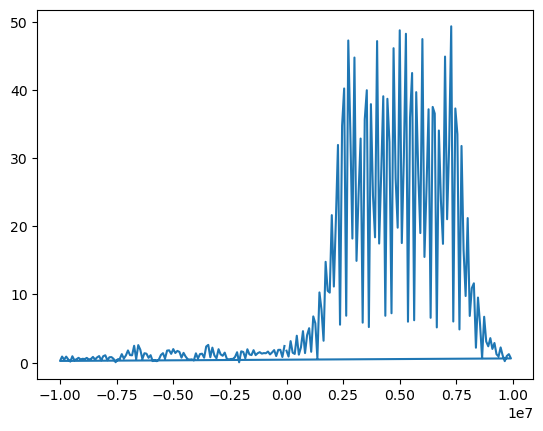

[ 1.00000000e+00-0.30930498j  8.05041731e-01+0.7223962j
  2.83298070e-01+0.95274042j -3.66037214e-01+0.99524366j
 -8.67517522e-01+0.43521508j -9.85871019e-01-0.19807083j
 -6.44314330e-01-0.8405159j   1.57073173e-02-1.07814308j
  6.77976411e-01-0.78088514j  9.96555171e-01-0.08588583j
  7.81831482e-01+0.64887487j  1.27559216e-01+1.02137236j
 -6.09354686e-01+0.81161306j -9.92935955e-01+0.12877521j
 -7.70513243e-01-0.62512282j -5.60704472e-02-0.98149919j
  7.03926183e-01-0.70266091j  9.98165117e-01+0.03983036j
  6.02213200e-01+0.74826511j -2.29079041e-01+0.92327528j
 -9.00968868e-01+0.42684312j -8.98027576e-01-0.38493813j
 -1.96190637e-01-0.8957832j   6.69686290e-01-0.695695j
  9.94204696e-01+0.0692039j   4.83718887e-01+0.77418709j
 -4.49987113e-01+0.81353919j -9.92935955e-01+0.13560211j
 -6.37423990e-01-0.6660558j   3.15412441e-01-0.85138061j
  9.74927912e-01-0.22627972j  6.86181183e-01+0.62365659j
 -2.91894792e-01+0.85536408j -9.78302845e-01+0.21140231j
 -6.44314330e-01-0.66150293j  3.82

In [27]:
num_hilbert = 11
hilbert_transformer = np.zeros(num_hilbert, dtype=np.complex128)
for i in range(-num_hilbert // 2, num_hilbert // 2 + 1, 1):
    if i % 2 == 0:
        hilbert_transformer[i + num_hilbert // 2] = 0
    else:
        hilbert_transformer[i + num_hilbert // 2] = 2j / (np.pi * i)

hilbert_transformer[0 + num_hilbert // 2] = 1

signal_hilbert = np.convolve(signal_noised, hilbert_transformer, mode='same')
noise_hilbert = np.convolve(noise, hilbert_transformer, mode='same')

plt.plot(np.real(signal_hilbert), label='real')
# plt.plot(np.imag(signal_hilbert), label='imag')
plt.plot(np.abs(signal_hilbert), label='abs')
plt.show()

siganl_fft = np.fft.fft(signal_hilbert)
signal_fft_freq = np.fft.fftfreq(length, 1 / fs)
plt.plot(signal_fft_freq, np.abs(siganl_fft))
plt.show()

print(signal_hilbert)


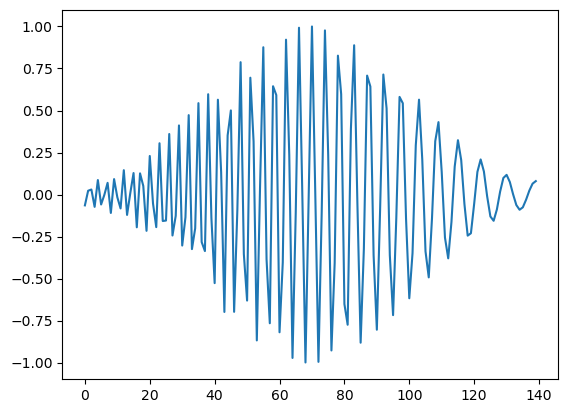

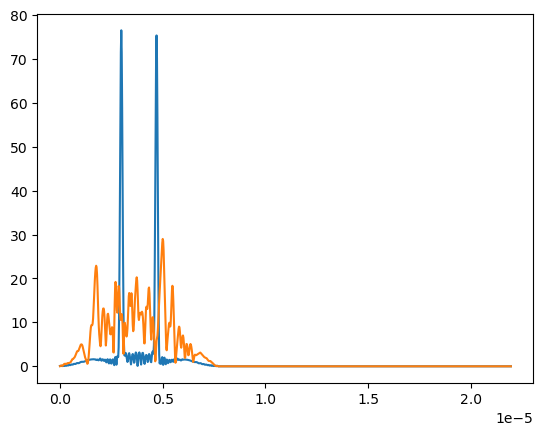

In [28]:
# 对希尔伯特滤波之后的信号进行匹配滤波（脉冲压缩）

from math import ceil, floor, log2

fft_len = 2 * length - 1
fft_len = ceil(0.5 + log2(fft_len))
fft_len = floor(0.5 + 2 ** fft_len)

# 线性调频信号作为参考信号
signal_ref = np.exp(-1j * (2 * np.pi * fl * times + np.pi * bw / tau * times ** 2))

# 翻转参考信号
signal_ref = np.flip(signal_ref)

# Hamming window
window = np.hamming(len(signal_ref))
signal_ref = signal_ref * window

plt.plot(signal_ref)
plt.show()

# 补零
signal_ref = np.pad(signal_ref, (0, fft_len - len(signal_ref)), 'constant')
signal_hilbert = np.pad(signal_hilbert, (0, fft_len - len(signal_hilbert)), 'constant')

# noise = wgn(length, 0)
noise_hilbert = np.pad(noise_hilbert, (0, fft_len - len(noise_hilbert)), 'constant')

# FFT
signal_ref_fft = np.fft.fft(signal_ref)
signal_hilbert_fft = np.fft.fft(signal_hilbert)
noise_hilbert_fft = np.fft.fft(noise_hilbert)

# 点乘
signal_matched = signal_ref_fft * signal_hilbert_fft
noise_matched = signal_ref_fft * noise_hilbert_fft

# IFFT
signal_matched = np.fft.ifft(signal_matched)
noise_matched = np.fft.ifft(noise_matched)

# 时间，结束值与fftlen对应
# tau + delay 对应 length
# fft_len = 2 * length - 1
axis_times = np.linspace(0, 2 * (tau + delay) - 1 / fs, fft_len)

plt.plot(axis_times, np.abs(signal_matched), label='signal-compressed')
# plt.plot(signal_matched_abs, label='signal-compressed')
plt.plot(axis_times, np.abs(noise_matched), label='noise-compressed')
plt.show()